<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Indicator Kriging

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy".  

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy, https://geostatsguy.github.io/GeostatsPyDemos_Book.  
```

The workflows in this book and more are available here:

```{admonition} Cite the GeostatsPyDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, GeostatsPyDemos: GeostatsPy Python Package for Spatial Data Analytics and Geostatistics Demonstration Workflows Repository (0.0.1). Zenodo. https://zenodo.org/doi/10.5281/zenodo.12667035

[![DOI](https://zenodo.org/badge/777871341.svg)](https://zenodo.org/doi/10.5281/zenodo.12667035)

```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Categorical Indicator Kriging** with GeostatsPy for estimating spatial categorical features, e.g., like facies. 

* specifically we use kriging to make estimates on a grid to display as a map.

**YouTube Lecture**: check out my lectures on:

* [Kriging](https://youtu.be/CVkmuwF8cJ8?si=TzwmoF7QtppoITOv). 
* [Indicator Methods and Indicator Kriging](https://youtu.be/6mCfgbh7f2g?si=Rr6PcAbBgvhltCH-). 

For your convenience here's a summary of salient points.

Kriging is the geostatistical workhorse for:

1. Prediction away from wells, e.g. pre-sample assessments, interpolation and extrapolation.
2. Spatial cross validation.
3. Spatial uncertainty modeling.

First let's explain the concept of spatial estimation.

#### Spatial Estimation

Consider the case of making an estimate at some unsampled location, $𝑧(\bf{u}_0)$, where $z$ is the property of interest (e.g. porosity etc.) and $𝐮_0$ is a location vector describing the unsampled location.

How would you do this given data, $𝑧(\bf{𝐮}_1)$, $𝑧(\bf{𝐮}_2)$, and $𝑧(\bf{𝐮}_3)$?

It would be natural to use a set of linear weights to formulate the estimator given the available data.

$$
z^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} z(\bf{u}_{\alpha})
$$

We could add an unbiasedness constraint to impose the sum of the weights equal to one.  What we will do is assign the remainder of the weight (one minus the sum of weights) to the global average; therefore, if we have no informative data we will estimate with the global average of the property of interest.

$$
z^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} z(\bf{u}_{\alpha}) + \left(1-\sum^{n}_{\alpha = 1} \lambda_{\alpha} \right) \overline{z}
$$

We will make a stationarity assumption, so let's assume that we are working with residuals, $y$. 

$$
y^{*}(\bf{u}) = z^{*}(\bf{u}) - \overline{z}(\bf{u})
$$

If we substitute this form into our estimator the estimator simplifies, since the mean of the residual is zero.

$$
y^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} y(\bf{u}_{\alpha})
$$

while satisfying the unbiasedness constraint.  

#### Kriging

Now the next question is what weights should we use?  

We could use equal weighting, $\lambda = \frac{1}{n}$, and the estimator would be the average of the local data applied for the spatial estimate. This would not be very informative.

We could assign weights considering the spatial context of the data and the estimate:

* **spatial continuity** as quantified by the variogram (and covariance function)
  
* **redundancy** the degree of spatial continuity between all of the available data with themselves
  
* **closeness** the degree of spatial continuity between the available data and the estimation location

The kriging approach accomplishes this, calculating the best linear unbiased weights for the local data to estimate at the unknown location.  The derivation of the kriging system and the resulting linear set of equations is available in the lecture notes.  Furthermore kriging provides a measure of the accuracy of the estimate!  This is the kriging estimation variance (sometimes just called the kriging variance).

$$
\sigma^{2}_{E}(\bf{u}) = C(0) - \sum^{n}_{\alpha = 1} \lambda_{\alpha} C(\bf{u}_0 - \bf{u}_{\alpha})
$$

What is 'best' about this estimate? Kriging estimates are best in that they minimize the above estimation variance. 

#### Properties of Kriging

Here are some important properties of kriging:

* **Exact interpolator** - kriging estimates with the data values at the data locations
  
* **Kriging variance** can be calculated before getting the sample information, as the kriging estimation variance is not dependent on the values of the data nor the kriging estimate, i.e. the kriging estimator is homoscedastic.
  
* **Spatial context** - kriging takes into account, furthermore to the statements on spatial continuity, closeness and redundancy we can state that kriging accounts for the configuration of the data and structural continuity of the variable being estimated.
  
* **Scale** - kriging may be generalized to account for the support volume of the data and estimate. We will cover this later.
  
* **Multivariate** - kriging may be generalized to account for multiple secondary data in the spatial estimate with the cokriging system. We will cover this later.
  
* **Smoothing effect** of kriging can be forecast. We will use this to build stochastic simulations later.

#### Indicator Formalism

Here we use indicator methods to estimate a categorical feature in space, but there are many more aspects of indicator methods that we could cover:

* Estimation and Simulation with categorical variables with explicit control of spatial continuity of each category
* Estimation and simulation with continuous variables with explicit control of the spatial continuity of different magnitudes
* Requires indicator coding of data, a probability coding based on category or threshold
* Requires indicator variograms to describe the spatial continuity.

If $i(\bf{u}:z_k)$ is an indicator for a categorical variable,  

* what is the probability of a realization equal to a category?

$$
i(\bf{u}; z_k) =
\begin{cases} 
    1, & \text{if } Z(\bf{u}) = z_k \\
    0, & \text{if } Z(\bf{u}) \ne z_k 
\end{cases}
$$

for example, 

* given threshold, $z_2 = 2$, and data at $\bf{u}_1$, $z(\bf{u}_1) = 2$, then $i(bf{u}_1; z_2) = 1$
* given threshold, $z_1 = 1$, and a RV away from data, $Z(\bf{u}_2)$ then is calculated as $F^{-1}_{\bf{u}_2}(z_1)$ of the RV as $i(\bf{u}_2; z_1) = 0.23$

If $i(\bf{u}:z_k)$ is an indicator for a continuous variable,  

* what is the probability of a realization less than or equal to a threshold?

$$
i(\bf{u}; z_k) =
\begin{cases} 
    1, & \text{if } Z(\bf{u}) \le z_k \\
    0, & \text{if } Z(\bf{u}) > z_k 
\end{cases}
$$

for example,

* given threshold, $z_1 = 6\%$, and data at $\bf{u}_1$, $z(\bf{u}_1) = 8\%$, then $i(\bf{u}_1; z_1) = 0$
* given threshold, $z_4 = 18\%$, and a RV away from data, $Z(\bf{u}_2) = N\left[\mu = 16\%,\sigma = 3\%\right]$ then $i(\bf{u}_2; z_4) = 0.75$

The indicator coding may be applied over an entire random function by indicator transform of all the random variables at each location.

#### Indicator Variogram

Variogram's calculated and modelled from the indicator transform of spatial data and used for indicator kriging. The indicator variogram is,

$$
\gamma_i(\mathbf{h}; z_k) = \frac{1}{2N(\mathbf{h})} 
\sum_{\alpha=1}^{N(\mathbf{h})} 
\left[ i(\mathbf{u}_\alpha; z_k) - i(\mathbf{u}_\alpha + \mathbf{h}; z_k) \right]^2
$$

where $i(\mathbf{u}_\alpha; z_k)$ and $i(\mathbf{u}_\alpha + \mathbf{h}; z_k)$ are the indicator transforms for the $z_k$ threshold at the tail location $\mathbf{u}_\alpha$ and head location $\mathbf{u}_\alpha + \mathbf{h}$ respectively. 

* for hard data the indicator transform $i(\bf{u},z_k)$ is either 0 or 1, in which case the $\left[ i(\mathbf{u}_\alpha; z_k) - i(\mathbf{u}_\alpha + \mathbf{h}; z_k) \right]^2$ is equal to 0 when the values at head and tail are both $\le z_k$ (for continuous features) or $= z_k$  (for categorical features), the same relative to the threshold, or 1 when they are different.

* therefore, the indicator variogram is $\frac{1}{2}$ the proportion of pairs that change! The indicator variogram can be related to probability of change over a lag distance, $h$.

* the sill of an indicator variogram is the indicator variance calculated as,

$$
\sigma_i^2 = p \cdot (1 - p)
$$ 

where $p$ is the proportion of 1's (or zeros as the function is symmetric over proportion)


#### Indicator Kriging

The application of simple kriging to a set of *indicator transforms*, one for each threshold for a continuous features, or one for each category for cateogorical features, of the data to directly estimate the local uncertainty model *cumulative distribution function* at an unknown location, $\bf{u}$.

The indicator kriging estimator is defined as,

$$
p^*_{IK}(\mathbf{u}; k) =
\sum_{\alpha=1}^n \lambda_\alpha(k) \cdot i(\mathbf{u}_\alpha; k) 
+ \left( 1 - \sum_{\alpha=1}^n \lambda_\alpha(k) \right) \cdot p(k)
$$

where $\lambda_\alpha(k)$ is the indicator kriging weight for data $\alpha$ and category or threshold $k$, $i(\mathbf{u}_\alpha; k)$ is the $k$ category or threshold indicator transform of the data at location $\mathbf{u}_\alpha$ and $p(k)$ is the global or local mean categorical probability (if a trend model is provided) or the continuous cumulative probability.

* by estimating probability $p^*_{IK}(\mathbf{u}; k)$ for each threshold or category we are directly estimating the distribution of uncertainty at an unsampled location without any distribution assumption (i.e., no Gaussian assumption)

The steps for indicator kriging are,

1. Establish a series of thresholds or categories:  

* for categorical features, the categories are given 

* for continuous features, the thresholds should cover the entire range of the feature with enough thresholds to represent the local distributions of uncertainty (so we can resolve the local *cumulative distribution function*'s)

* for continuous features, the thresholds may be related to critical thresholds, e.g., environmental limits, economic thresholds. 

2. Apply indicator transformation to the data

3. Calculate the *indicator variogram* from the indicator transformation of the data for each threshold or category

4. Apply indicator kriging to estimate the cumulative probability for continuous features or probability for categorical features at an unsampled location, using the indicator variogram for each threshold or category

5. Correct the final cumulative distribution function to be valid, this is called the *order relations correction*. 

* since each threshold's cumulative probability is estimated by indicator kriging separately, the resulting cumulative distribution function may not be valid, i.e., non-monotonic increasing

* since each category's probability is estimated by indictor kriging separately, the probabilities may not sum to one

General comments,

* a variogram model is needed for each threshold or category; therefore, a more difficult inference problem, however, there is greater flexibility as spatial continuity may vary by value, for example, greater spatial continuity for upper tail of the feature distribution 

* more readily integrates data of different types through soft data encoding, for example, we could assign a *random variable* (distribution) at data locations instead of a single value


#### Order Relations Correction

Due to the separate estimation of each cumulative probability over each threshold with indicator kriging the cumulative distribution may not be valid, for example,

* nonmonotonic behavior for continuous features

* sum of categorical probabilities not equal to one (fail to honor probability closure)

For categorical features the order relations correction is the same as the L1 normalizer (machine learning feature transformations),

$$
i(\bf{u}_{\alpha};z_k)^{\prime} = \frac{i(\bf{u}_{\alpha};z_k)}{\sum_{i=1}^K i(\bf{u}_{\alpha};z_i)}
$$

* cumulative probability for each threshold $i(\bf{u}_{\alpha};z_k)$ are divided by the sum of all the cumulative probabilities, $\sum_{i=1}^K i(\bf{u}_{\alpha};z_i)$ to ensure they sum to 1.0

For continuous features this involves a two pass calculation that results in two possible cumulative distribution functions that are monotonic increasing that are then averaged to get the corrected result (see my lecture, [Indicator Methods](https://youtu.be/6mCfgbh7f2g?si=gcbW0V0zvP1UfNxu)).


#### Load the Required Libraries

The following code loads the required libraries.

In [6]:
import geostatspy.GSLIB as GSLIB                              # GSLIB utilities, visualization and wrapper
import geostatspy.geostats as geostats                        # GSLIB methods convert to Python      
import geostatspy
print('GeostatsPy version: ' + str(geostatspy.__version__))  

GeostatsPy version: 0.0.71


We will also need some standard packages. These should have been installed with Anaconda 3.

In [9]:
import os                                                     # set working directory, run executables

from tqdm import tqdm                                         # suppress the status bar
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)

ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
import matplotlib.pyplot as plt                               # for plotting
import matplotlib as mpl                                      # custom colorbar
import matplotlib.ticker as mticker                           # custom colorpar ticks
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs. 

#### Define Functions

This is a convenience function to add major and minor gridlines and a combine location map and pixelplot that has color maps and color bars to improve plot interpretability.

In [12]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks  
    
def locpix_colormaps_st(array,xmin,xmax,ymin,ymax,step,vmin,vmax,df,xcol,ycol,vcol,title,xlabel,ylabel,vlabel_loc,vlabel,cmap_loc,cmap):
    xx, yy = np.meshgrid(
        np.arange(xmin, xmax, step), np.arange(ymax, ymin, -1 * step)
    )
    cs = plt.imshow(array,interpolation = None,extent = [xmin,xmax,ymin,ymax], vmin = vmin, vmax = vmax,cmap = cmap)
    plt.scatter(df[xcol],df[ycol],s=None,c=df[vcol],marker=None,cmap=cmap_loc,vmin=vmin,vmax=vmax,alpha=0.8,linewidths=0.8,
        edgecolors="black",)
    plt.title(title); plt.xlabel(xlabel); plt.ylabel(ylabel); plt.xlim(xmin, xmax); plt.ylim(ymin, ymax)
    cbar_loc = plt.colorbar(orientation="vertical",pad=0.08,ticks=[0, 1],
            format=mticker.FixedFormatter(['Shale','Sand'])); cbar_loc.set_label(vlabel_loc, rotation=270,labelpad=20)
    cbar = plt.colorbar(cs,orientation="vertical",pad=0.05); cbar.set_label(vlabel, rotation=270,labelpad=20)
    return cs

#### Make Custom Colorbar

We make this colorbar to display our categorical, sand and shale facies.

In [15]:
cmap_facies = mpl.colors.ListedColormap(['grey','gold'])
cmap_facies.set_over('white'); cmap_facies.set_under('white')

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [18]:
#os.chdir("d:/PGE383")                                        # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object. 

* note the "fraction_data" variable is an option to randomly take a proportion of the data (i.e., 1.0 is all data).

    * this is not standard part of spatial estimation, but fewer data is easier to visualize given our grid size (we want multiple cells between the data to see the behavior away from data)

* note, I often remove unnecessary data table columns. This clarifies workflows and reduces the chance of blunders, e.g., using the wrong column!

In [21]:
fraction_data = 0.2                                           # extract a fraction of data for demonstration / faster runs, set to 1.0 for homework

df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_MV_biased.csv") # load the data from Dr. Pyrcz's GitHub repository

if fraction_data < 1.0:
    df = df.sample(frac = fraction_data,replace = False,random_state = 73073)
df = df.reset_index()
df = df.iloc[:,2:6]                                           # remove unnecessary features

df_sand = pd.DataFrame.copy(df[df['Facies'] == 1]).reset_index()  # copy only 'Facies' = sand records
df_shale = pd.DataFrame.copy(df[df['Facies'] == 0]).reset_index() # copy only 'Facies' = shale records
df.head(n=3)                                                  # we could also use this command for a table preview 

,X,Y,Facies,Porosity
0,280.0,409.0,1.0,0.136716
1,230.0,749.0,1.0,0.204587
2,300.0,500.0,1.0,0.159891


#### Summary Statistics

Let's look at summary statistics for all facies combined:

In [24]:
df.describe().transpose()                                     # summary table of all facies combined DataFrame statistics
df_sand.describe().transpose()                                # summary table of sand only DataFrame statistics
df_shale.describe().transpose()                               # summary table of shale only DataFrame statistics

,count,mean,std,min,25%,50%,75%,max
index,30.0,36.833333,21.133538,3.000000,19.750000,34.500000,53.750000,73.000000
X,30.0,505.333333,274.461647,70.000000,260.000000,500.000000,777.500000,990.000000
Y,30.0,399.433333,266.244467,19.000000,204.750000,334.000000,639.000000,999.000000
Facies,30.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Porosity,30.0,0.095903,0.017411,0.062169,0.088839,0.099708,0.106937,0.122079


#### PDF and CDFs

Let's also look at the distributions, facies PDF and porosity CDF by facies. 

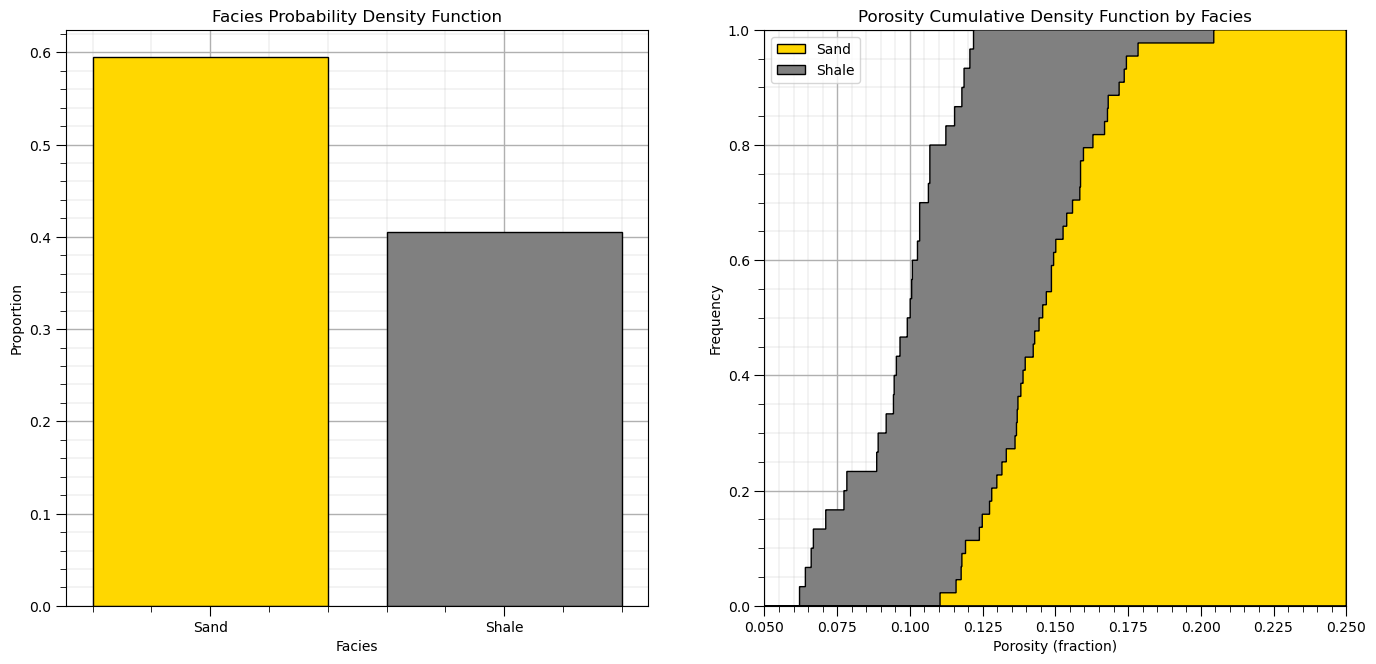

In [27]:
plt.subplot(121)
df['Facies_Names'] = np.where(df['Facies']==0,'Shale','Sand')
facies_counts = df['Facies_Names'].value_counts()/len(df); color = ['gold','grey']
plt.bar(x=['Sand','Shale'],height=facies_counts,color=color,edgecolor='black')
plt.ylabel('Proportion'); plt.xlabel('Facies'); plt.title('Facies Probability Density Function'); add_grid()

plt.subplot(122)                                              # plot original sand and shale porosity histograms
plt.hist(df_sand['Porosity'], facecolor='gold',bins=np.linspace(0.0,0.25,1000),histtype="stepfilled",alpha=1.0,density=True,cumulative=True,edgecolor='black',label='Sand',zorder=10)
plt.hist(df_shale['Porosity'], facecolor='grey',bins=np.linspace(0.0,0.25,1000),histtype="stepfilled",alpha=1.0,density=True,cumulative=True,edgecolor='black',label='Shale',zorder=9)
plt.xlim([0.05,0.25]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity')
plt.legend(loc='upper left'); plt.title('Porosity Cumulative Density Function by Facies'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3); plt.show()

For brevity we will omit data declustering from this workflow. We will assume declustered means for the porosity and permeability to apply with simple kriging.

#### Specify the Grid

Let's specify a reasonable grid to the estimation map.

* we balance detail and computation time. Note kriging computation complexity scales $O(n_{cell})$

* so if we half the cell size we have 4 times more grid cells in 2D, 4 times the runtime

In [30]:
xmin = 0.0; xmax = 1000.0                                     # range of x values
ymin = 0.0; ymax = 1000.0                                     # range of y values

xsiz = 10; ysiz = 10                                          # cell size
nx = 100; ny = 100                                            # number of cells
xmn = 5; ymn = 5                                              # grid origin, location center of lower left cell

tmin = -999; tmax = 999;                                      # data trimming limits

pormin = 0.05; pormax = 0.22                                  # set feature min and max for colorbars

#### Location Maps

Let's plot the location maps of facies and porosity.

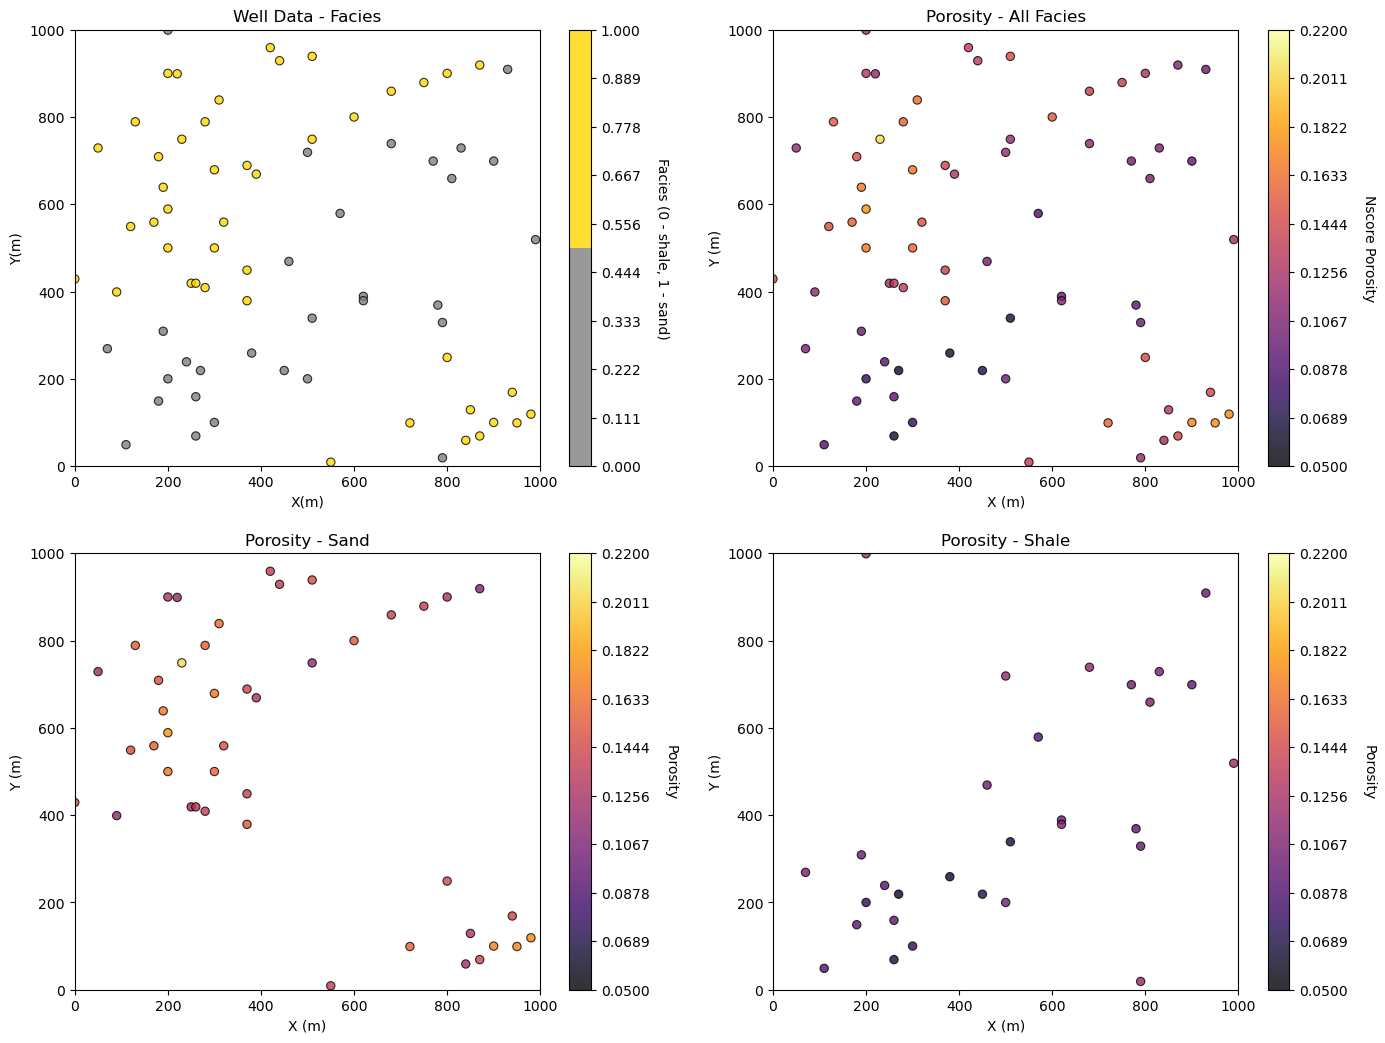

In [35]:
plt.subplot(221)                                              # location map facies 
GSLIB.locmap_st(df,'X','Y','Facies',xmin,xmax,ymin,ymax,0,1,'Well Data - Facies','X(m)','Y(m)',
                'Facies (0 - shale, 1 - sand)',cmap=cmap_facies)

plt.subplot(222)
GSLIB.locmap_st(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Porosity - All Facies','X (m)','Y (m)',
                'Nscore Porosity',cmap)

plt.subplot(223)
GSLIB.locmap_st(df_sand,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Porosity - Sand','X (m)','Y (m)',
                'Porosity',cmap)

plt.subplot(224)
GSLIB.locmap_st(df_shale,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Porosity - Shale','X (m)','Y (m)',
                'Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.2, hspace=0.2); plt.show()

#### Indicator Kriging for Facies 

To demonstrate kriging we will assume variogram models, rather than calculate experimental variograms and then model them.  This is for brevity and so we can be free to experiment with different vairogram models to observe the impact on kriging.

Let's first set up the basic indicator kriging parameters:

In [37]:
nxdis = 1; nydis = 1                                          # block kriging discretizations, 1 for point kriging
ndmin = 0; ndmax = 10                                         # minimum and maximum data for kriging 
radius = 500                                                  # maximum search distance
ktype = 0                                                     # kriging type, 0 - simple, 1 - ordinary
ivtype = 0                                                    # variable type, 0 - categorical, 1 - continuous

Now, let's specify the facies categories, global proportions along with the spatial continuity models for both facies.

In [40]:
ncut = 2                                                      # number of facies
thresh = [0,1]                                                # the facies categories
gcdf = [0.4,0.6]                                              # the global proportions of the categories
vrange = 500.0                                                # variogram range
varios = []                                                   # the variogram list
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=vrange,hmin1=vrange)) # shale ind. variogram
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=vrange,hmin1=vrange)) # sand ind. variogram

We are ready to run the indicator kriging with the 2 categories (sand and shale) and calculate the probability of sand and shale at all locations and plot the results.

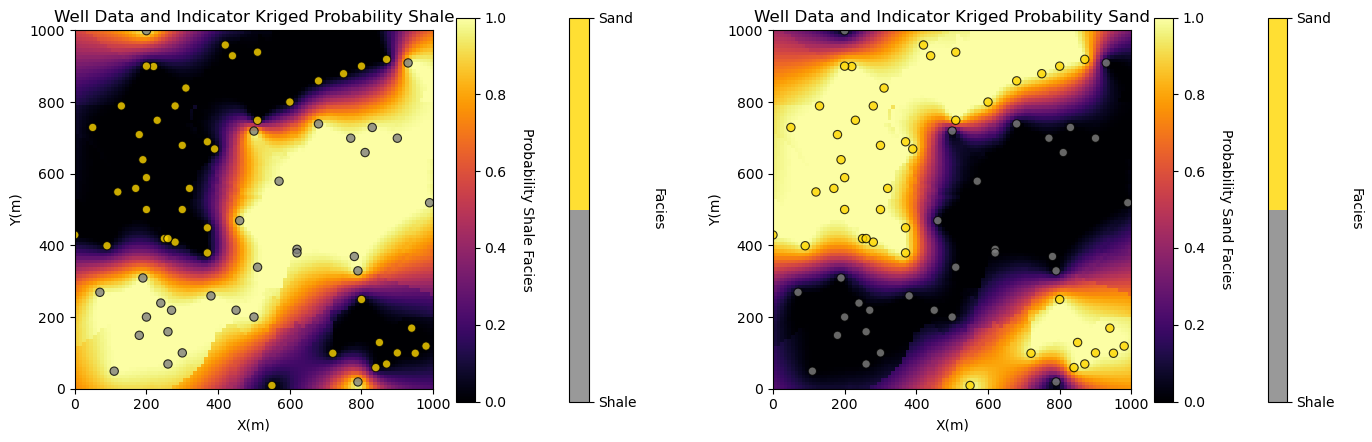

In [43]:
%%capture --no-display   

no_trend = np.zeros((1,1))                                    # null ndarray not of correct size so ik2d will not trend
ikmap = geostats.ik2d(df,'X','Y','Facies',ivtype,0,2,thresh,gcdf,no_trend,tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,
                ndmin,ndmax,radius,ktype,vario=varios)

plt.subplot(121) 
locpix_colormaps_st(ikmap[:,:,0],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,df,'X','Y','Facies',
                'Well Data and Indicator Kriged Probability Shale',
                'X(m)','Y(m)','Facies','Probability Shale Facies',cmap_facies,cmap)
plt.subplot(122) 
locpix_colormaps_st(ikmap[:,:,1],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,df,'X','Y','Facies',
                'Well Data and Indicator Kriged Probability Sand',
                'X(m)','Y(m)','Facies','Probability Sand Facies',cmap_facies,cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.2, hspace=0.2); plt.show()

The results are quite interesting.  With the use of ordinary kriging we are able to handle the nonstationarity in the sand a shale data.  See how the probability remains consistent away from data in locations with consistent facies. 

* For a surprising result, switch to simple kriging. We are actually using quite a short variogram range and we see the global proportions away from the data!

#### By-facies Kriging for Porosity

Now let's try some kriging with the continuous properties. For this workflow we will demonstrate a cookie-cutter approach.  The steps are:

1. model the facies, sand and shale, probabilities with indicator kriging
2. model the porosity for sand and shale separately and exhaustively, i.e. at all locations in the model
3. model the permeability for sand and shale separately and exhaustively, i.e. at all locations in the model
4. assign sand and shale locations based on the probabilities from step 1 
5. combine the porosity and permeability from sand and shale regions together

Limitations of this Workflow:

* kriging is too smooth, the spatial continuity is too high
* kriging does not reproduce the continuous property distributions
* we are not accounting for the correlation between porosity and permeability 

We will correct these issues when we perform simulation later.

We need to add a couple of parameters and assume a porosity variogram model.


In [49]:
no_trend = np.zeros((1,1))                                    # null ndarray not of correct size so ik2d will not trend
skmean_por = 0.10; skmean_perm = 65.0                         # simple kriging mean (if simple kriging is selected below)
ktype = 0                                                     # kriging type, 0 - simple, 1 - ordinary
radius = 300                                                  # search radius for neighbouring data
nxdis = 1; nydis = 1                                          # number of grid discretizations for block kriging
ndmin = 0; ndmax = 20                                         # minimum and maximum data for an estimate
tmin = 0.0                                                    # minimum property value
por_vrange = 300                                              # porosity variogram range
por_vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=45,hmaj1=por_vrange,hmin1=por_vrange) # por. variogram

Let's start with spatial estimates of porosity and permeability with all facies combined. We will also look at the kriging estimation variance.

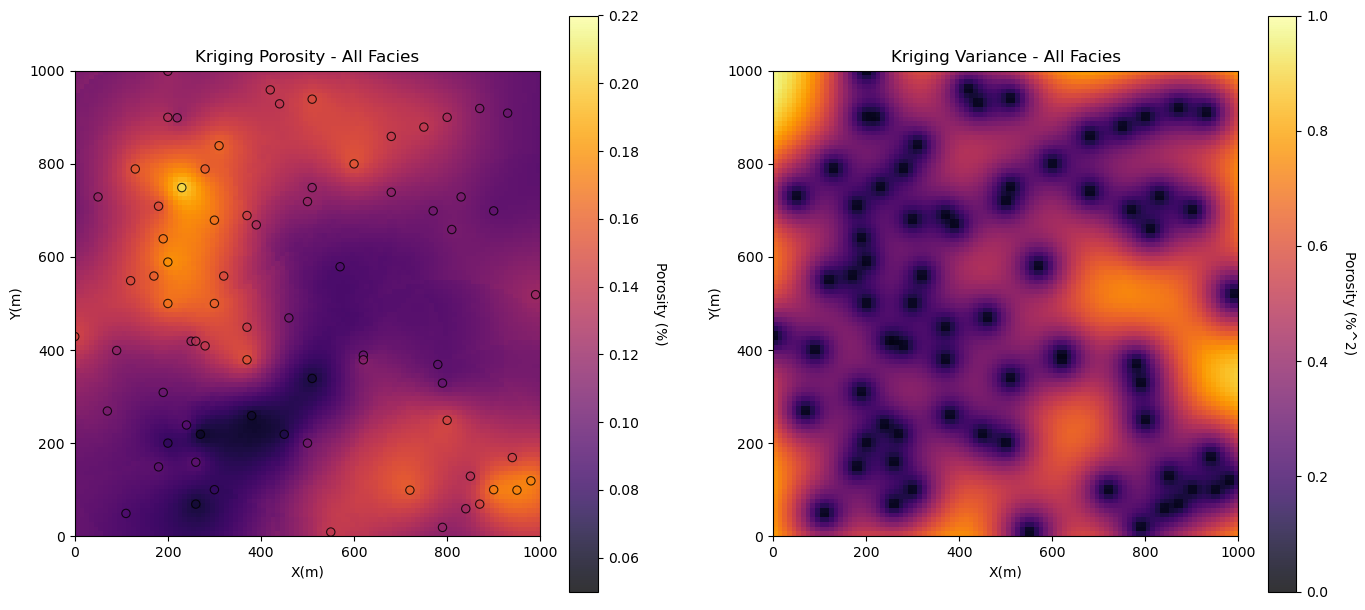

In [52]:
%%capture --no-display   

por_kmap, por_vmap = geostats.kb2d(df,'X','Y','Porosity',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,nxdis,nydis,
         ndmin,ndmax,radius,ktype,skmean_por,por_vario)

plt.subplot(121)
GSLIB.locpix_st(por_kmap,xmin,xmax,ymin,ymax,xsiz,pormin,pormax,df,'X','Y','Porosity','Kriging Porosity - All Facies',
                'X(m)','Y(m)','Porosity (%)',cmap)

plt.subplot(122)
GSLIB.pixelplt_st(por_vmap,xmin,xmax,ymin,ymax,xsiz,0.0,1.0,'Kriging Variance - All Facies','X(m)','Y(m)',
                  'Porosity (%^2)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2); plt.show()

The results look good. 

Now let's build spatial estimation models for sand and shale separately. Now we need variograms for sand and shale separately, along with the declustered global means if simple kriging is used.

In [55]:
skmean_por_sand = 0.10; skmean_por_shale = 0.08
skmean_perm_sand = 3.0; skmean_perm_shale = 0.5

por_sand_vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=500,hmin1=500) # porosity sand variogram
por_shale_vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=500,hmin1=500) # porosity shale variogram

facies_kmap = np.zeros((ny,nx)); por_kmap = np.zeros((ny,nx)); perm_kmap = np.zeros((ny,nx)) # declare arrays for results

We are now ready to run these models, by-facies and visualize the results.

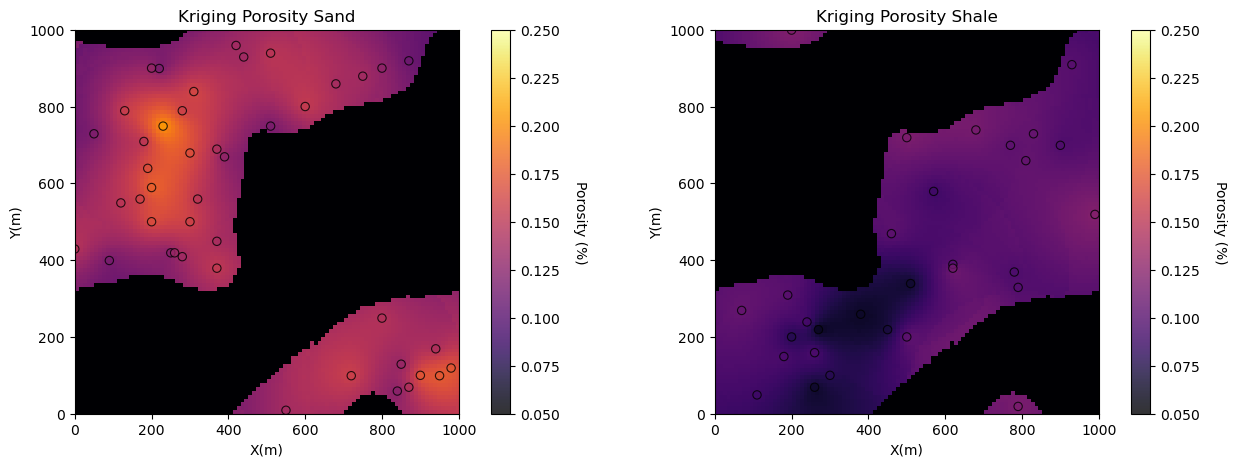

In [58]:
%%capture --no-display   

por_sand_kmap, por_sand_vmap = geostats.kb2d(df_sand,'X','Y','Porosity',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,nxdis,nydis,
         ndmin,ndmax,radius,ktype,skmean_por_sand,por_sand_vario) # sand porosity kriging
por_shale_kmap, por_shale_vmap = geostats.kb2d(df_shale,'X','Y','Porosity',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,nxdis,nydis,
         ndmin,ndmax,radius,ktype,skmean_por_shale,por_shale_vario) # shale porosity kriging

for iy in range(0,ny):                                        # cookie cutter approach, assume most likely facies
    for ix in range(0,nx):
        if ikmap[iy,ix,1] > 0.5:   # current location is assumed to be sand
            facies_kmap[iy,ix] = 1
            por_kmap[iy,ix] = por_sand_kmap[iy,ix];
            por_shale_kmap[iy,ix] = -1
        else:                      # current location is assumed to be shale
            facies_kmap[iy,ix] = 0
            por_kmap[iy,ix] = por_shale_kmap[iy,ix];
            por_sand_kmap[iy,ix] = -1

plt.subplot(121)                                              # plot porosity estimates in sand          
GSLIB.locpix_st(por_sand_kmap,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df_sand,'X','Y','Porosity','Kriging Porosity Sand',
                'X(m)','Y(m)','Porosity (%)',cmap)

plt.subplot(122)                                              # plot porosity estimates in shale
GSLIB.locpix_st(por_shale_kmap,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df_shale,'X','Y','Porosity','Kriging Porosity Shale',
                'X(m)','Y(m)','Porosity (%)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.0, hspace=0.2); plt.show()

Now let's visualize the estimation models for porosity and permeability by-facies put together as a single map for each property.

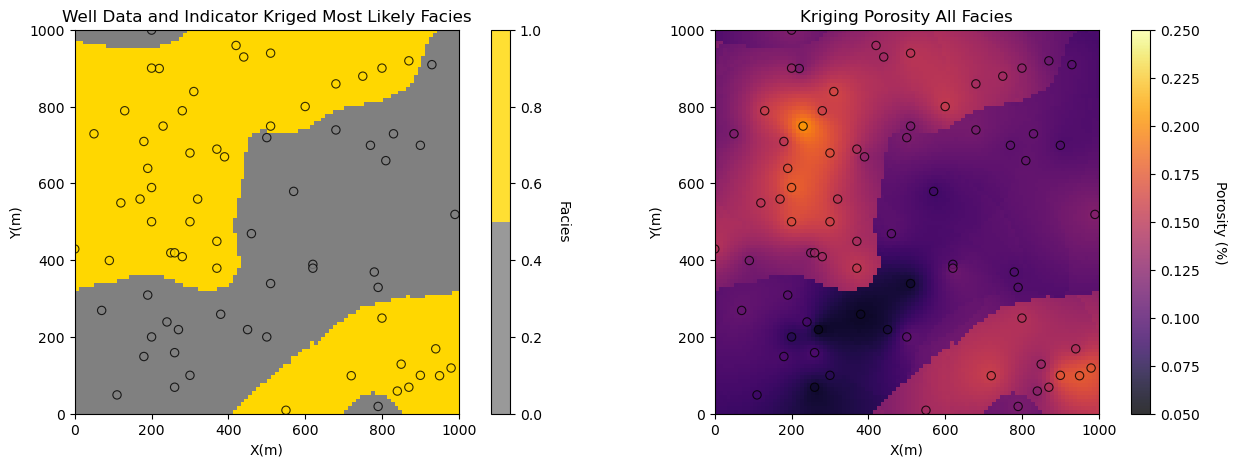

In [61]:
plt.subplot(121)                                              # plot facies estimates
GSLIB.locpix_st(facies_kmap,xmin,xmax,ymin,ymax,xsiz,0.0,1.0,df,'X','Y','Facies',
                'Well Data and Indicator Kriged Most Likely Facies',
                'X(m)','Y(m)','Facies',cmap_facies)

plt.subplot(122)                                              # plot porosity estimates
GSLIB.locpix_st(por_kmap,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity',
                'Kriging Porosity All Facies','X(m)','Y(m)','Porosity (%)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.0, hspace=0.2); plt.show()

#### Comments

This was a basic demonstration of indicator kriging for categorical spatial estimation and continuous estimation by spatial category with GeostatsPy. Much more can be done, I have other demonstrations for modeling workflows with GeostatsPy in the GitHub repository [GeostatsPy_Demos](https://github.com/GeostatsGuy/GeostatsPy_Demos/tree/main).

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)